# **Introduction:**

The data used in this notebook contains market information such as prospective buyers' Gender, Age, EstimatedSalary, as well as whether or not they actually purchased the product (Purchased). This notebook investigated whether a prospective buyers' Gender, Age, EstimatedSalary could determine whether or not they actually purchased the product (Purchased). First, we explored what the average consumer looked like and plotted market trends using histograms, and Boxplot.  From these, we learned that only customer Age and EstimatedSalary were significant predictors of product Purchased and the model builts using these information could predict possible buyers with accuracy.







# Uploading Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


# Import pandas Labrary , showing and read dataset

In [ ]:
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.describe()#view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Age visualization by histplot

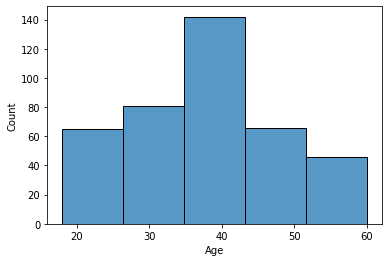

In [ ]:
import seaborn as sns
sns.histplot(data=df, x = 'Age', bins=5)

# How do Age and EstimatedSalary relate with one another?

In the data, females tend to have a higher median age and median salary than males.



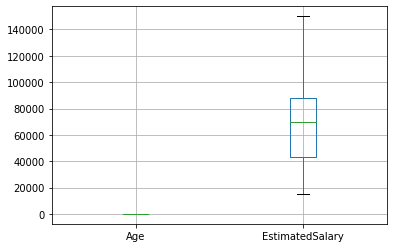

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
df.boxplot(['Age', 'EstimatedSalary'])

In [ ]:
df.groupby(by=["Gender"]).count()#How many male and Female of Gender

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,204,204,204,204
Male,196,196,196,196


In [ ]:
df['Gender'] = df['Gender'].replace(['Female','Male'],[0,1])#Replacing Gender column male=1, female=0

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
df.dtypes# Checking Datatypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

## Having Show Among correlationships age, gender and Estimatedsalary

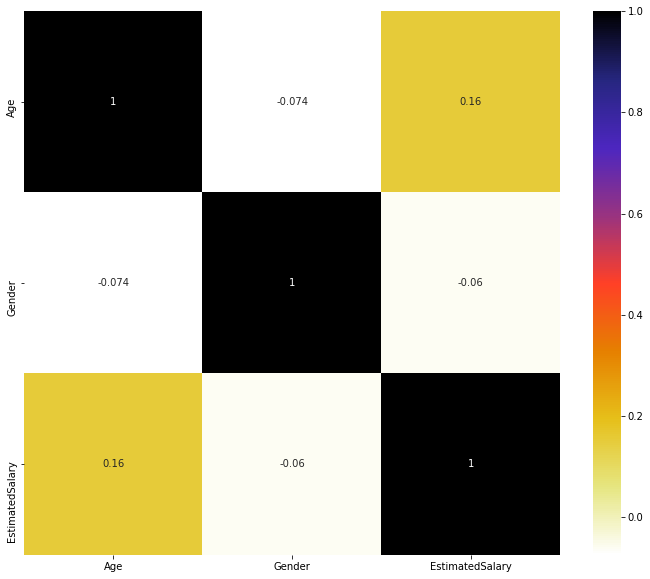

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df[['Age','Gender','EstimatedSalary']].corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
 def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(df[['Age','Gender','EstimatedSalary']],0.7)#correlation features sets
corr_features

set()

## Feature Selection

In [ ]:
feature_cols = ['Age','Gender','EstimatedSalary']
X = df[feature_cols]
y = df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.svm import SVC #SVM Classificer
from sklearn import preprocessing

#Training and Testing data randomly have taken 85%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
X_train_new = preprocessing.scale(X_train)
X_test_new = preprocessing.scale(X_test)
X_test


,Age,Gender,EstimatedSalary
210,48,0,96000
34,27,1,90000
63,32,1,120000
293,37,1,77000
204,58,0,101000
353,37,0,57000
200,35,1,39000
324,48,0,131000
379,58,0,23000
220,41,0,80000


## This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [ ]:
X_test.info()#Testing data information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 210 to 334
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              60 non-null     int64
 1   Gender           60 non-null     int64
 2   EstimatedSalary  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


## The k-fold cross-validation procedure is a standard method for estimating the performance of a machine learning algorithm or configuration on a dataset.

In [ ]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=40, shuffle=True)

model =  SVC(kernel="linear")#SVM classifier of used linear kernel
results = model_selection.cross_val_score(model, X_train_new, y_train, cv=kfold)#k-fold cross-validation
results

array([0.82352941, 0.85294118, 0.82352941, 0.94117647, 0.85294118,
       0.85294118, 0.82352941, 0.88235294, 0.91176471, 0.88235294])

In [ ]:
model.fit(X_train_new,y_train)#svm model fit
y_pred=model.predict(X_test_new)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
print("SVM_Accuracy:",metrics.accuracy_score(y_test, y_pred))#SVM model accuracy

SVM_Accuracy: 0.8666666666666667


In [ ]:
from sklearn.metrics import classification_report #Imported classification labrary
print(classification_report(y_test,y_pred))#svm model classification_report

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        39
           1       0.84      0.76      0.80        21

    accuracy                           0.87        60
   macro avg       0.86      0.84      0.85        60
weighted avg       0.87      0.87      0.87        60



In [ ]:
from sklearn.metrics import confusion_matrix #Imported confusion_matrix labrary
print(confusion_matrix(y_test,y_pred))#SVM confusion_matrix

[[36  3]
 [ 5 16]]


## visualization confusion_matrix by heatmap

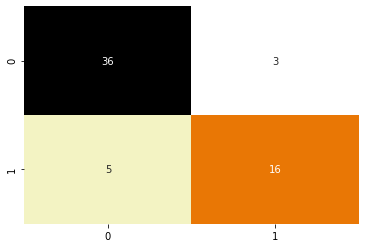

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),cbar=False,annot=True,fmt="d",cmap='CMRmap_r')

## #Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train_new,y_train)#random forest model fit
y_pred=rf.predict(X_test_new)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
print("RF_Accuracy:",metrics.accuracy_score(y_test, y_pred)) #Random forest classifier Accuracy

RF_Accuracy: 0.8833333333333333


In [ ]:
print(classification_report(y_test,y_pred))#Random forest classification_report

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.82      0.86      0.84        21

    accuracy                           0.88        60
   macro avg       0.87      0.88      0.87        60
weighted avg       0.89      0.88      0.88        60



In [ ]:
from sklearn.metrics import confusion_matrix #Imported confusion_matrix labrary
print(confusion_matrix(y_test,y_pred))#Random forest confusion_matrix

[[35  4]
 [ 3 18]]


## Visualization confusion_matrix by heatmap

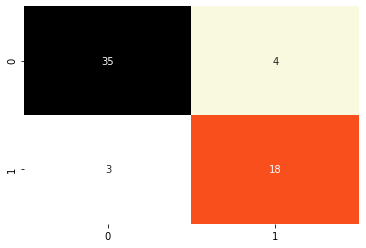

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),cbar=False,annot=True,fmt="d",cmap='CMRmap_r')

In [ ]:
from sklearn import tree # Decicision Tree
tree = tree.DecisionTreeClassifier()# Decision Tree Classifier
tree.fit(X_train_new,y_train)#Decision Tree Classifier model fit
y_pred = tree.predict(X_test_new)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
print("Decicision Tree_Accuracy:",metrics.accuracy_score(y_test, y_pred))#Decision Tree Classifier Accuracy

Decicision Tree_Accuracy: 0.85


In [ ]:
print(classification_report(y_test,y_pred))#Decision Tree Classifier classification_report

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        39
           1       0.75      0.86      0.80        21

    accuracy                           0.85        60
   macro avg       0.83      0.85      0.84        60
weighted avg       0.86      0.85      0.85        60



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))#Random forest confusion_matrix

[[33  6]
 [ 3 18]]


## Visualization confusion_matrix by heatmap


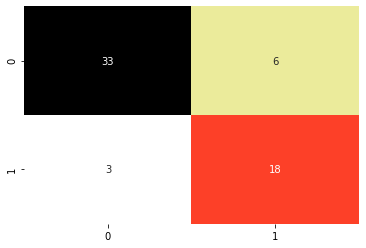

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),cbar=False,annot=True,fmt="d",cmap='CMRmap_r')

In [ ]:
from sklearn.naive_bayes import GaussianNB#Gaussian Naive Bayes and import labrary
gnb = GaussianNB()##Naive Bayes Classifier
gnb.fit(X_train_new,y_train)#Naive Bayes Classifier model fit
y_pred = gnb.predict(X_test_new)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
print("Naive_bayes_Accuracy:",metrics.accuracy_score(y_test, y_pred))#Naive Bayes Classifier Accuracy

Naive_bayes_Accuracy: 0.85


In [ ]:
print(classification_report(y_test,y_pred))#Naive Bayes Classifier classification_report

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.80      0.76      0.78        21

    accuracy                           0.85        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.85      0.85      0.85        60



In [ ]:
print(confusion_matrix(y_test,y_pred))#Naive Bayes Classifier confusion_matrix

[[35  4]
 [ 5 16]]


## Visualization confusion_matrix by heatmap

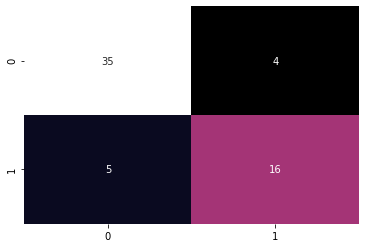

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),cbar=False,annot=True,fmt="d",cmap='CMRmap')